## Assignment 1:
Testing whether the distribution of ages is the same for

1) male and female riders

2) day and night riders

Using 3 tests: KS, Pearson's, Spearman's

In [ ]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
import datetime as dt
%pylab inline

###Importing, subdividing, and recoding data

In [78]:
trips = pd.read_csv('/Users/hannahbkates/Desktop/201410-citibike-tripdata.csv')
# trips.head(3)

In [79]:
print trips.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [80]:
trips['time'] = pd.to_datetime(trips['starttime'])
trips['time'] = trips['time'].dt.hour

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'time'],
      dtype='object')


In [95]:
trips['age'] = 2015-trips['birth year'][(trips['birth year'] > 1925) &
                                       (trips['usertype'] == 'Subscriber')]
# male
trips['ageM'] = trips['age'][trips['gender'] == 1]
# female
trips['ageF'] = trips['age'][trips['gender'] == 2]
# night rider
trips['ageN'] = trips['age'][(trips['time']<5) | (trips['time']>19)]
# day rider
trips['ageD'] = trips['age'][(trips['time']>=5) & (trips['time']<=19)]

#Differences in age distribution by gender

## Visualization

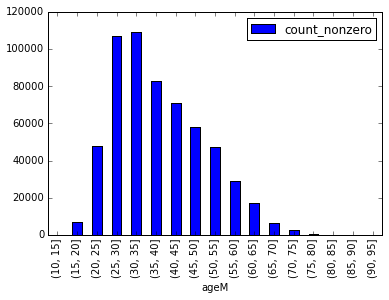

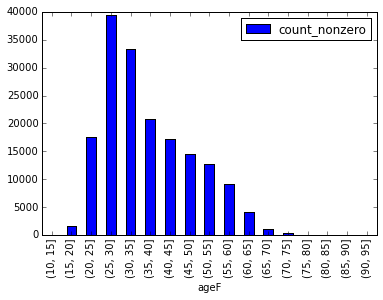

In [30]:
bins = np.arange(10, 99, 5)
trips.ageM.groupby(pd.cut(trips.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
trips.ageF.groupby(pd.cut(trips.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.001969
(20, 25]       0.018638
(25, 30]       0.065515
(30, 35]       0.073309
(35, 40]       0.053654
(40, 45]       0.032280
(45, 50]       0.018056
(50, 55]       0.010757
(55, 60]       0.013697
(60, 65]       0.008268
(65, 70]       0.003279
(70, 75]       0.000351
(75, 80]       0.000060
(80, 85]       0.000090
(85, 90]       0.000000
(90, 95]            NaN


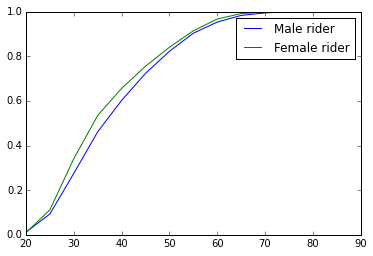

In [100]:
csM = trips.ageM.groupby(pd.cut(trips.ageM, bins)).agg([count_nonzero]).cumsum()
csF = trips.ageF.groupby(pd.cut(trips.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Male rider")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Female rider")
pl.legend()

##Statistical analysis

### 1. K-S Statistic

In [108]:
ks_mf = scipy.stats.ks_2samp(trips.ageM[~np.isnan(trips.ageM)], trips.ageF[~np.isnan(trips.ageF)])
print 'Genders:'
print 'K-S Statistic:', ks_mf[0]
print 'p-value:', ks_mf[1]

Genders:
K-S Statistic: 0.0733091748557
p-value: 0.0


It is likely that the two samples came from the same distribution.

### 2. Pearson's

In [113]:
pear_mf = scipy.stats.pearsonr(trips.ageM, trips.ageF)
print 'Genders:'
print 'Correlation coefficient:', pear_mf

Genders:
Correlation coefficient: (nan, 1.0)


The two samples do correlate with each other.

### 3. Spearman's

In [110]:
spear_mf = scipy.stats.spearmanr(trips.ageM, trips.ageF)
print 'Genders:'
print 'Correlation coefficient:', spear_mf[0]
print 'p-value:', spear_mf[1]

Genders:
Correlation coefficient: -0.436065517059
p-value: 0.0


The two samples do correlate with each other.

#Differences in age distribution by daytime vs. nighttime

##Visualization

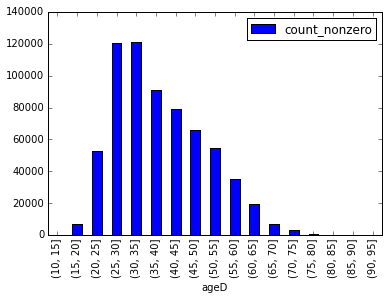

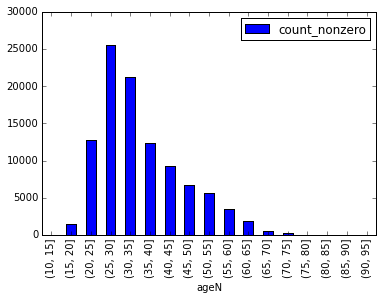

In [98]:
bins = np.arange(10, 99, 5)
trips.ageD.groupby(pd.cut(trips.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
trips.ageN.groupby(pd.cut(trips.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 15]            NaN
(15, 20]       0.003961
(20, 25]       0.049335
(25, 30]       0.117681
(30, 35]       0.142799
(35, 40]       0.127169
(40, 45]       0.098724
(45, 50]       0.064875
(50, 55]       0.038356
(55, 60]       0.019793
(60, 65]       0.007836
(65, 70]       0.002693
(70, 75]       0.000640
(75, 80]       0.000250
(80, 85]            NaN
(85, 90]       0.000000
(90, 95]            NaN


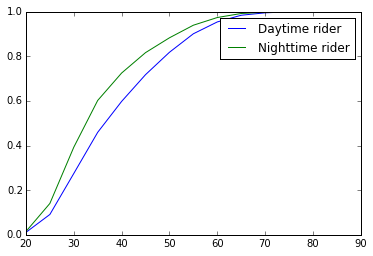

In [99]:
csD = trips.ageD.groupby(pd.cut(trips.ageD, bins)).agg([count_nonzero]).cumsum()
csN = trips.ageN.groupby(pd.cut(trips.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Daytime rider")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Nighttime rider")
pl.legend()

##Statistical analysis

### 1. K-S Statistic

In [101]:
ks_dn = scipy.stats.ks_2samp(trips.ageD[~np.isnan(trips.ageD)], trips.ageN[~np.isnan(trips.ageN)])
print 'Day vs. Night:'
print 'K-S Statistic:', ks_dn[0]
print 'p-value:', ks_dn[1]

Day vs. Night:
K-S Statistic: 0.143385710892
p-value: 0.0


### 2. Pearson's

In [105]:
pear_dn = scipy.stats.pearsonr(trips.ageD, trips.ageN)
print 'Day vs. Night:'
print 'Correlation coefficient:', pear_dn

Day vs. Night:
Correlation coefficient: (nan, 1.0)


### 3. Spearman's

In [111]:
spear_dn = scipy.stats.spearmanr(trips.ageD, trips.ageN)
print 'Day vs. Night:'
print 'Correlation coefficient:', spear_dn[0]
print 'p-value:', spear_dn[1]

Day vs. Night:
Correlation coefficient: -0.282649459022
p-value: 0.0
